# Ratings Prediction Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("ratings_prediction_project.csv")

In [3]:
df.head()

,Unnamed: 0,Review_title,Review_text,Ratings
0,0,Suitable for School kids,\n If you are a College student or a professi...,2.0 out of 5 stars
1,1,Misrepresentation on MS Office 2019 license - ...,\n Update after one month usage - MS Office 2...,2.0 out of 5 stars
2,2,The sold me renewed laptop,\n It’s look like renewed laptop because lapt...,2.0 out of 5 stars
3,3,Amazon dupes with specification/ battery sucks,\n &nbsp;I had seen the specifications and bo...,2.0 out of 5 stars
4,4,Display back light issue,\n Display gone with 2 months.. But anyway th...,2.0 out of 5 stars


In [4]:
df.shape

(77550, 4)

There are 77550 rows and 4 columns.

Column Information:

Review_title : title of the review
Review_text : content of the review text
Ratings : ratings are out of 5 stars
First I will drop the unwanted column "Unnamed: 0" from our dataset as it holds meaning less index information.

# EDA

In [5]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [6]:
df

,Review_title,Review_text,Ratings
0,Suitable for School kids,\n If you are a College student or a professi...,2.0 out of 5 stars
1,Misrepresentation on MS Office 2019 license - ...,\n Update after one month usage - MS Office 2...,2.0 out of 5 stars
2,The sold me renewed laptop,\n It’s look like renewed laptop because lapt...,2.0 out of 5 stars
3,Amazon dupes with specification/ battery sucks,\n &nbsp;I had seen the specifications and bo...,2.0 out of 5 stars
4,Display back light issue,\n Display gone with 2 months.. But anyway th...,2.0 out of 5 stars
...,...,...,...
77545,Nice product,good product,4
77546,Awesome,Very good as expected and happy with the purchase,5
77547,Awesome,I love it! No complaint!,5
77548,Nice product,good product,4


So now there are 77550 rows and 3 columns

# Missing values

In [7]:
df.isnull().sum()

Review_title    9029
Review_text     8085
Ratings         9027
dtype: int64

There are 9029 missing values in "Review_title",8085 missing values in"Review_text "and 9027 missing values in"Ratings"column.All these missing values have to be treated.

# Graphical representation of missing values

<AxesSubplot:>

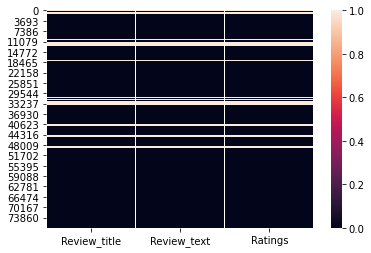

In [8]:
sns.heatmap(df.isnull())

The heat map also shows the presence of missing values.

We can see that the above white lines represent the NaN values present in our dataframe that will need to be removed.

In [9]:
print("We have {} Rows and {} Columns in our dataframe before removing NaN".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We have {} Rows and {} Columns in our dataframe after removing NaN".format(df.shape[0], df.shape[1]))

We have 77550 Rows and 3 Columns in our dataframe before removing NaN
We have 68294 Rows and 3 Columns in our dataframe after removing NaN


In [10]:
df.isnull().sum()

Review_title    0
Review_text     0
Ratings         0
dtype: int64

Great looks like we were able to successfully remove all the missing data and the new dataframe has 68294 Rows and 3 Columns in it.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68294 entries, 0 to 77549
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_title  68294 non-null  object
 1   Review_text   68294 non-null  object
 2   Ratings       68294 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


Using the info method we are able to confirm the non null count details as well as the datatype information. We have all the 3 columns showing as object datatype here.

In [12]:
df['Ratings'].unique()

array(['2.0 out of 5 stars', '3.0 out of 5 stars', '1.0 out of 5 stars',
       '5.0 out of 5 stars', '4.0 out of 5 stars', '5', '1', '4', '3',
       '2'], dtype=object)

Looking at these unique values in our target column we can see that the string enteries need to be replaced with the respective numeric values (number of stars)



In [13]:
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)
df['Ratings'] = df['Ratings'].astype('int')
df['Ratings'].unique()

array([2, 3, 1, 5, 4])

So we were able to incorporate the string object datatype values with numeric star values and the target column is clean with integer data in it.



In [14]:
# Now combining the "Review_title" and "Review_text" columns into one single column called "Review"
df['Review'] = df['Review_title'].map(str)+' '+df['Review_text']
df

,Review_title,Review_text,Ratings,Review
0,Suitable for School kids,\n If you are a College student or a professi...,2,Suitable for School kids \n If you are a Coll...
1,Misrepresentation on MS Office 2019 license - ...,\n Update after one month usage - MS Office 2...,2,Misrepresentation on MS Office 2019 license - ...
2,The sold me renewed laptop,\n It’s look like renewed laptop because lapt...,2,The sold me renewed laptop \n It’s look like ...
3,Amazon dupes with specification/ battery sucks,\n &nbsp;I had seen the specifications and bo...,2,Amazon dupes with specification/ battery sucks...
4,Display back light issue,\n Display gone with 2 months.. But anyway th...,2,Display back light issue \n Display gone with...
...,...,...,...,...
77545,Nice product,good product,4,Nice product good product
77546,Awesome,Very good as expected and happy with the purchase,5,Awesome Very good as expected and happy with t...
77547,Awesome,I love it! No complaint!,5,Awesome I love it! No complaint!
77548,Nice product,good product,4,Nice product good product


I have combined the columns Review_title and Review_text to create a new column called Review that has the consolidated comments.

# Visualizing text in first three rows from the newly created "Review" column

In [15]:
df['Review'][0]

'Suitable for School kids \n  If you are a College student or a professional who depends heavily on laptop for pretty much everyday then  this laptop is not for you. It hangs more often than it runs. Cannot install essential computer science software such as Eclipse or android studio because then this laptop just dies.<br><br>I took this laptop thinking that it will have good performance based on its configuration.<br><br>But if you are someone who wants to attend online classes or just browse, then you may go for this laptop.\n'

In [16]:
df['Review'][1]

'Misrepresentation on MS Office 2019 license - it is one month trial \n  Update after one month usage - MS Office 2019 preinstalled edition became unlicensed version within 30 days and refused to activate. HP support shared their product sheet that stated that this laptop came only with a trial version of MS Office 2019. Now I am chasing seller Appario Retail to honour the commitment.<br><br>Bad experience after paying high price (around ₹67,000) for preinstalled genuine software.<br><br>Other wise product has sleek looks, superfast fingerprint scanner, very good display, very responsive touchpad, decent (but tinny) speakers, USB C and barrel plug charging options and under 10 second boot up (SSD drive). Preloaded with Win10 Home and MS Office (not sure whether trial or full version). Drawbacks - weighs 1.42 kg, base gets warm rather quickly and so does the power adapter. Decent for a college student.\n'

In [17]:
df['Review'][2]

'The sold me renewed laptop \n  It’s look like renewed laptop because laptop charging jack is loose and left side speaker sounds like it’s tear. Bad sound quality  and finger sensor quality look like 2011 touch phone of wing and any Chinese phone touch. Waste of money and one more thing day by day Amazon product quality getting poor\n'

In [18]:

# Importing nltk libraries
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 8] nodename nor servname provided, or not
[nltk_data]     known>


# Text Processing to remove unwanted punctuations and special characters

In [19]:
'''Here I am defining a function to replace some of the contracted words to their full form and removing urls and some 
unwanted text'''

def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

# Lowercasing the alphabets
df['Review'] = df['Review'].apply(lambda x : x.lower())
df['Review'] = df['Review'].apply(lambda x : decontracted(x))

# Removing punctuations from the review
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('\n',' ')


<ipython-input-19-96d92761f4ab>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review'] = df['Review'].str.replace('[^\w\s]','')


In [20]:
# Removing all the stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

Visualizing text in first three rows after applying various text cleaning procedures

In [21]:
df['Review'][0]

'suitable school kids college student professional depends heavily laptop pretty much everyday laptop hangs often runs cannot install essential computer science software eclipse android studio laptop dies took laptop thinking good performance based configuration someone wants attend online classes browse may go laptop'

In [22]:
df['Review'][1]

'misrepresentation ms office 2019 license one month trial update one month usage ms office 2019 preinstalled edition became unlicensed version within 30 days refused activate hp support shared product sheet stated laptop came trial version ms office 2019 chasing seller appario retail honour commitment bad experience paying high price around 67000 preinstalled genuine software wise product sleek looks superfast fingerprint scanner good display responsive touchpad decent tinny speakers usb c barrel plug charging options 10 second boot ssd drive preloaded win10 home ms office sure whether trial full version drawbacks weighs 142 kg base gets warm rather quickly power adapter decent college student'

In [23]:
df['Review'][2]

'sold renewed laptop look like renewed laptop laptop charging jack loose left side speaker sounds like tear bad sound quality finger sensor quality look like 2011 touch phone wing chinese phone touch waste money one thing day day amazon product quality getting poor'

# Lemmatization

In [24]:
# Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
# Defining function to lemmatize our text
def lemmatize_sentence(sentence):
    # tokenize the sentence and find the pos_tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    # tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)    

df['Review'] = df['Review'].apply(lambda x : lemmatize_sentence(x))

NameError: name 'lemmatizer' is not defined

In [25]:
df['Review'][0]

'suitable school kids college student professional depends heavily laptop pretty much everyday laptop hangs often runs cannot install essential computer science software eclipse android studio laptop dies took laptop thinking good performance based configuration someone wants attend online classes browse may go laptop'

In [26]:
df['Review'][1]

'misrepresentation ms office 2019 license one month trial update one month usage ms office 2019 preinstalled edition became unlicensed version within 30 days refused activate hp support shared product sheet stated laptop came trial version ms office 2019 chasing seller appario retail honour commitment bad experience paying high price around 67000 preinstalled genuine software wise product sleek looks superfast fingerprint scanner good display responsive touchpad decent tinny speakers usb c barrel plug charging options 10 second boot ssd drive preloaded win10 home ms office sure whether trial full version drawbacks weighs 142 kg base gets warm rather quickly power adapter decent college student'

In [27]:
df['Review'][2]

'sold renewed laptop look like renewed laptop laptop charging jack loose left side speaker sounds like tear bad sound quality finger sensor quality look like 2011 touch phone wing chinese phone touch waste money one thing day day amazon product quality getting poor'

# Text Normalization - Standardization

In [28]:
# Noise removal function
def scrub_words(text):
    # remove HTML markup
    text = re.sub("(<.*?>)", "", text)
    # remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # remove white space
    text = text.strip()
    return text

df['Review'] = df['Review'].apply(lambda x : scrub_words(x))


In [29]:
df['Review'][0]

'suitable school kids college student professional depends heavily laptop pretty much everyday laptop hangs often runs cannot install essential computer science software eclipse android studio laptop dies took laptop thinking good performance based configuration someone wants attend online classes browse may go laptop'

In [30]:
df['Review'][1]

'misrepresentation ms office  license one month trial update one month usage ms office  preinstalled edition became unlicensed version within  days refused activate hp support shared product sheet stated laptop came trial version ms office  chasing seller appario retail honour commitment bad experience paying high price around  preinstalled genuine software wise product sleek looks superfast fingerprint scanner good display responsive touchpad decent tinny speakers usb c barrel plug charging options  second boot ssd drive preloaded win home ms office sure whether trial full version drawbacks weighs  kg base gets warm rather quickly power adapter decent college student'

In [31]:
df['Review'][2]

'sold renewed laptop look like renewed laptop laptop charging jack loose left side speaker sounds like tear bad sound quality finger sensor quality look like  touch phone wing chinese phone touch waste money one thing day day amazon product quality getting poor'

# Word Counts

In [32]:
# Creating column for word counts in the review text
df['Review_WC'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_WC', 'Review']].head(10)

,Review_WC,Review
0,43,suitable school kids college student professio...
1,103,misrepresentation ms office license one month...
2,43,sold renewed laptop look like renewed laptop l...
3,21,amazon dupes specification battery sucks nbspi...
4,16,display back light issue display gone months ...
5,7,battery life battery backup give one hour
6,18,professional works blue screen power linux ope...
7,8,monitor power issue monitor turning weeks pur...
8,6,waste waste money sometimes screen marks
9,5,able download warranty card good


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


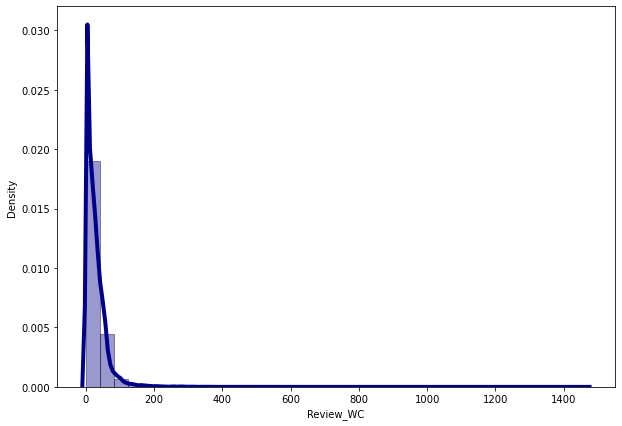

In [33]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Looking at the above histogram we can clearly observe that most of our text is having the number of words in the range of 0 to 200. But some of the reviews are too lengthy which may act like outliers in our data.

# Character Counts

In [34]:
# Creating column for character counts in the review text
df['Review_CC'] = df['Review'].str.len()
df[['Review_CC','Review']].head(10)

,Review_CC,Review
0,318,suitable school kids college student professio...
1,675,misrepresentation ms office license one month...
2,260,sold renewed laptop look like renewed laptop l...
3,138,amazon dupes specification battery sucks nbspi...
4,110,display back light issue display gone months ...
5,41,battery life battery backup give one hour
6,128,professional works blue screen power linux ope...
7,51,monitor power issue monitor turning weeks pur...
8,40,waste waste money sometimes screen marks
9,32,able download warranty card good


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


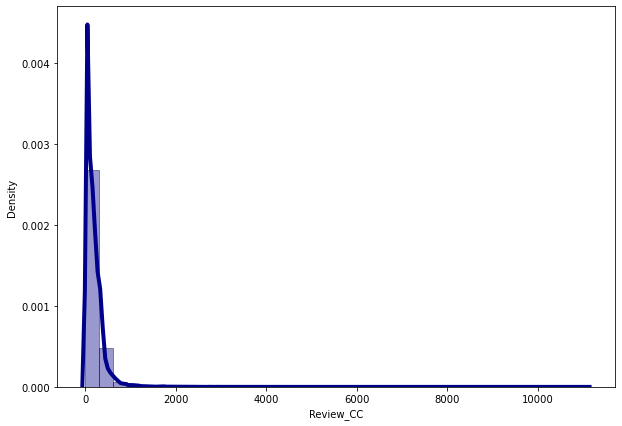

In [35]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Above plot represents histogram for character count of review text, which is quite similar to the histogram of word count.

# Removing Outliers

In [36]:
from scipy import stats
from scipy.stats import zscore
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score


In [37]:
# Applying zscore to remove outliers
z_score = zscore(df[['Review_WC']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
print("We have {} Rows and {} Columns in our dataframe after removing outliers".format(df.shape[0], df.shape[1]))

We have 67261 Rows and 6 Columns in our dataframe after removing outliers


As we know that some of the review are too lengthy I am removing those reviews from the data as outliers using Z score method. By removing outliers we are loosing only arround 1000 entries which is acceptable here for getting beter results for our model.

# Visualization

# Plotting histograms for word count and character count again after removing the outliers

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


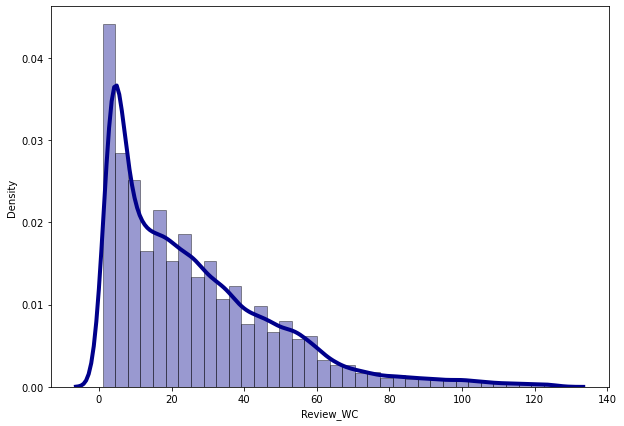

In [38]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In the above histogram+distribution plot we can see that number and density for short word reviews are greater than the one's with lengthy detailed information.

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


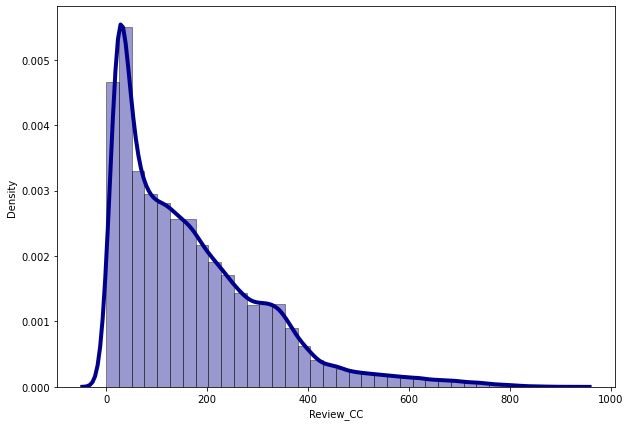

In [39]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In the above histogram+distribution plot we can see that the character details are automatically similar to the word count details and very few people go to the lengths of typing summarized review comments.

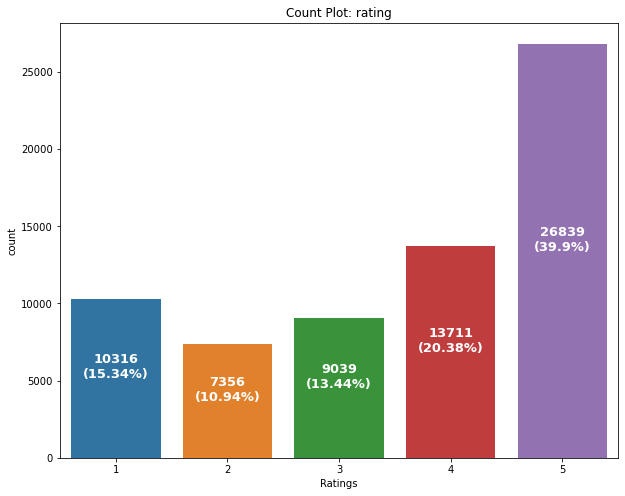

In [40]:
# Checking the ratings column details using count plot
x = 'Ratings'
fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=x,data=df,ax=ax)
p=0
for i in ax.patches:
    q = i.get_height()/2
    val = i.get_height()
    ratio = round(val*100/len(df),2)
    prn = f"{val}\n({ratio}%)"
    ax.text(p,q,prn,ha="center",color="white",rotation=0,fontweight="bold",fontsize="13")
    p += 1
    
plt.title("Count Plot: rating")
plt.show()

Observation:

1)We can see that the highest number of customer rating received are for 5 stars
2)Then we have 4 star rating reviews present in our dataset
3)However we see a high 1 star rating as well compared to 2 and 3 star rating reviews

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

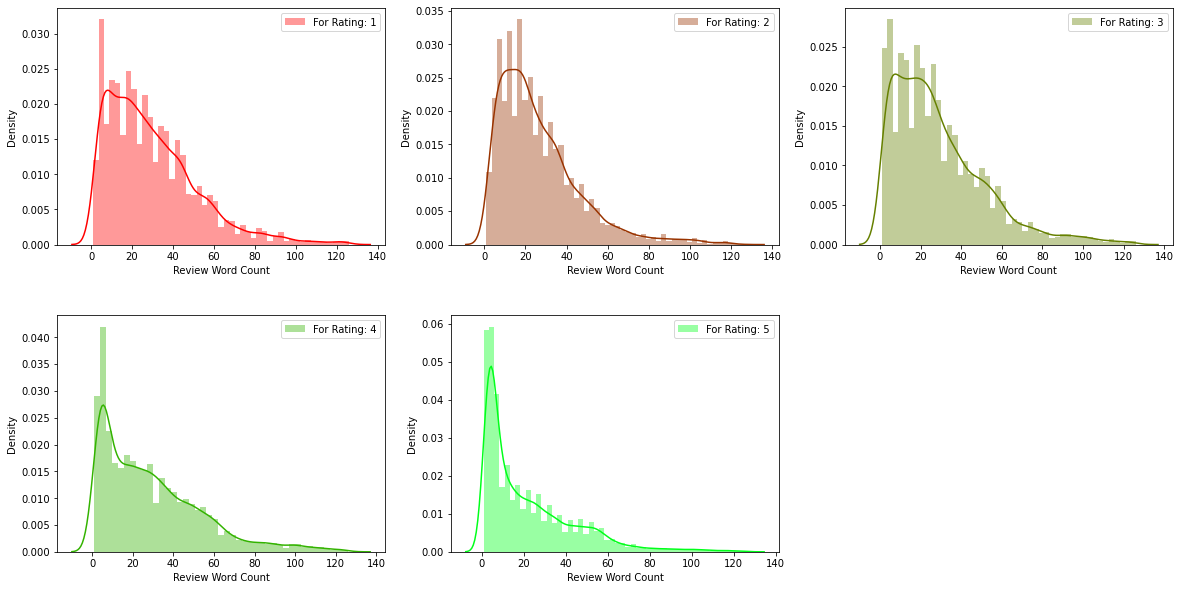

In [41]:
# Checking review word count distribution for each rating
ratings = np.sort(df.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.Review_WC[df.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Word Count")
    axis.legend()
    p += 1
    
plt.show()


Observation: The above word count histogram+distributions for each and every rating shows that when people are disappointed with a service they tend to mention a discriptive review as compared to when they are happy they use lesser words to express the joy of having got a great product.

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

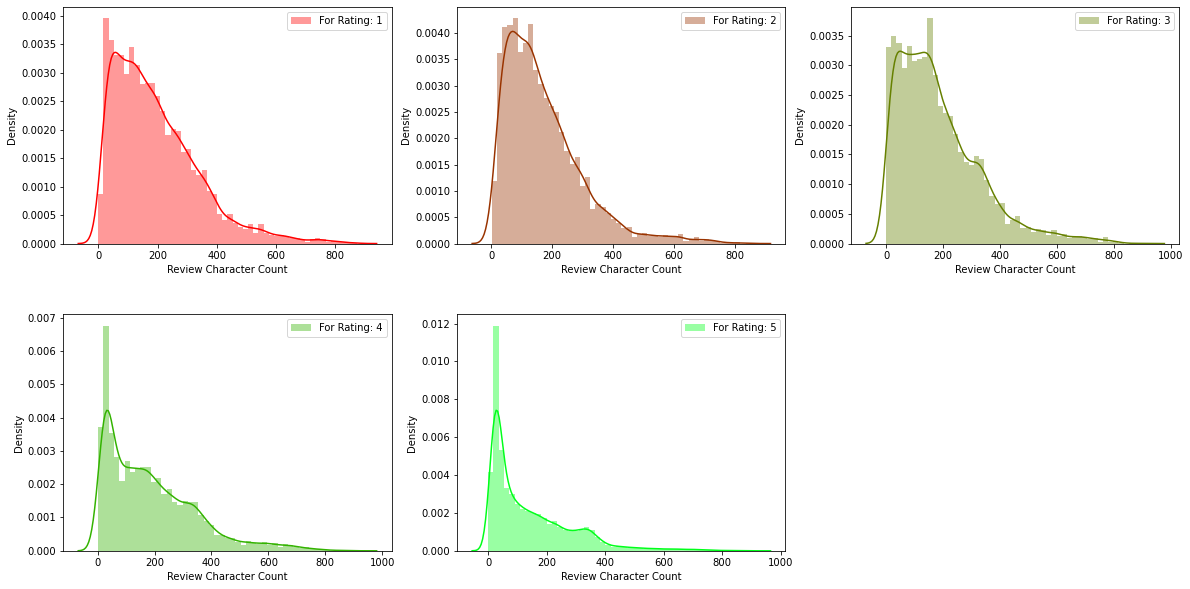

In [42]:
# Checking review character count distribution for each rating
ratings = np.sort(df.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.Review_CC[df.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Character Count")
    axis.legend()
    p += 1
    
plt.show()


Observation: Just as in the case of word count histogram+distribution plots the pattern is quite evident that Rating 5 reviews have lesser character counts on their comments when compared to the lower rating details.

5    26839
4    13711
1    10316
3     9039
2     7356
Name: Ratings, dtype: int64


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


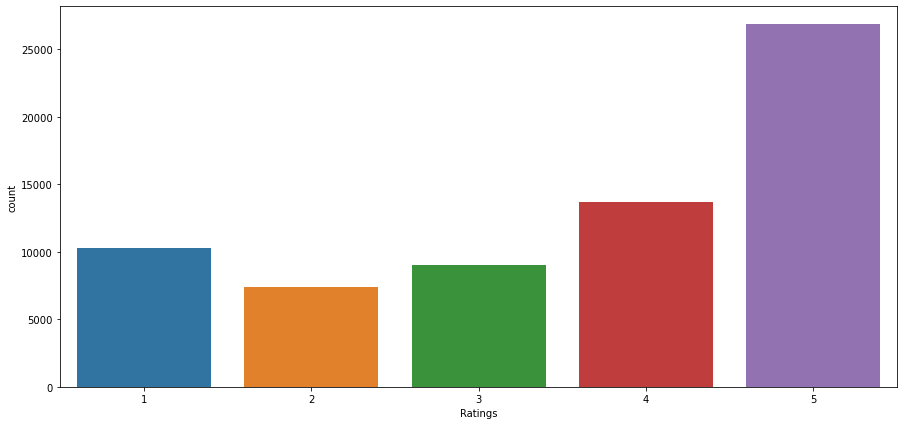

In [43]:
# Checking the count of target column values
plt.figure(figsize=(15,7))
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()

Observation:

Looking at the above count plot for our target varible (Ratings) we can say that the data set is having most number of reviews rated as 5 star and very less number of reviews rated as 2 star.
Which will cause the Imbalance problem for our Machine Learning model and make it bias.
So I am selecting equal number of reviews of each rating as a input for our model to avoid any kind of biasness
For that first I will shuffle the dataset so that we can select data from both web-sites (Amazon and Flipkart)
Then I will select equal number of data of every category and ensure that the rating values are balanced

In [44]:
# shuffling the entire data set
df = df.sample(frac=1).reset_index(drop=True)
df

,Review_title,Review_text,Ratings,Review,Review_WC,Review_CC
0,Wonderful,Nice product,5,wonderful nice product,3,22
1,Excellent,\n Worth a money\n,5,excellent worth money,3,21
2,very inaccurate measurement and disappointing,\n step count is very inaccurate.......despit...,2,inaccurate measurement disappointing step coun...,15,128
3,Great product,Camera is really awesome,5,great product camera really awesome,5,35
4,Good choice,It is a decent budgeted smart phone and main p...,4,good choice decent budgeted smart phone main p...,33,202
...,...,...,...,...,...,...
67256,Don't buy it.,\n I had given a good review earlier but 40 d...,5,buy given good review earlier days later diff...,38,253
67257,Not so good,\n - Rotating button has no function.<br>- Ha...,3,good rotating button function hand twist wake ...,24,146
67258,Wonderful,Good product 👍👍👍,5,wonderful good product,3,22
67259,Pure Sound,\n Writing it after using 2 days.<br>Pretty s...,5,pure sound writing using days pretty satisfie...,26,162


In [45]:
# Select data from every Ratings category
df1 = df[df['Ratings']==1][0:7356]
df2 = df[df['Ratings']==2][0:7356]
df3 = df[df['Ratings']==3][0:7356]
df4 = df[df['Ratings']==4][0:7356]
df5 = df[df['Ratings']==5][0:7356]

# Combining all the dataframes into one and shuffling them again
df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
df

,Review_title,Review_text,Ratings,Review,Review_WC,Review_CC
0,Not good,\n I am not good\n,2,good good,2,9
1,don't go for it,\n &nbsp;Dislike don't go for it the plastic ...,1,go nbspdislike go plastic light get broke easi...,20,124
2,Nice,I like this screen but left side screen are do...,3,nice like screen left side screen right side s...,9,51
3,Very poor,Only one day use...Dont buy this mobile\nWhile...,1,poor one day usedont buy mobile outgoing call ...,20,124
4,Perfect product!,Product was Too good and value for money🥳✅,5,perfect product product good value money,6,40
...,...,...,...,...,...,...
36775,Low sound,"\n Very bad sound quality, cannot be describe...",1,low sound bad sound quality cannot described e...,9,58
36776,Hated it!,Flipkart is very very very worst online shoppi...,1,hated flipkart worst online shopping purchasin...,18,135
36777,Waste.appario shop,\n &nbsp;Don't buy this product on apporio re...,1,wasteappario shop nbspdo buy product apporio r...,14,97
36778,Best in the market!,Awesome product,5,best market awesome product,4,27


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    7356
2    7356
3    7356
4    7356
5    7356
Name: Ratings, dtype: int64


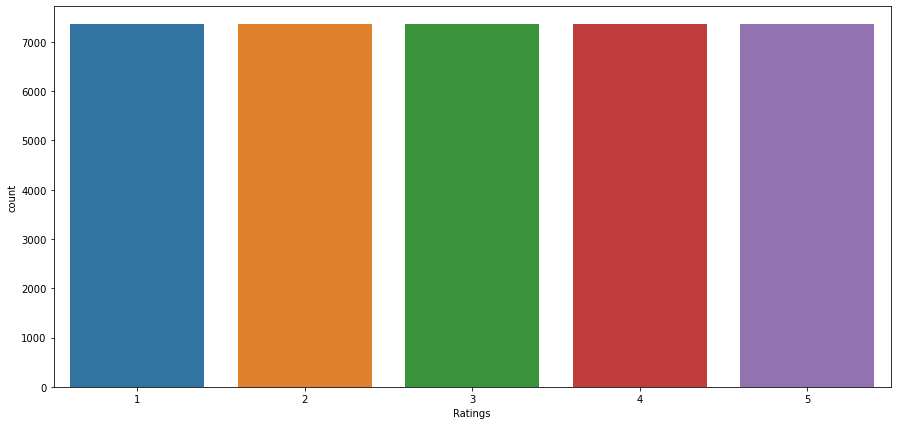

In [46]:
# lets Check the count of target column again to confirm the balance with a visual
plt.figure(figsize=(15,7))
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()

we have balanced our data successfully.



# Top 30 most frequently occuring words


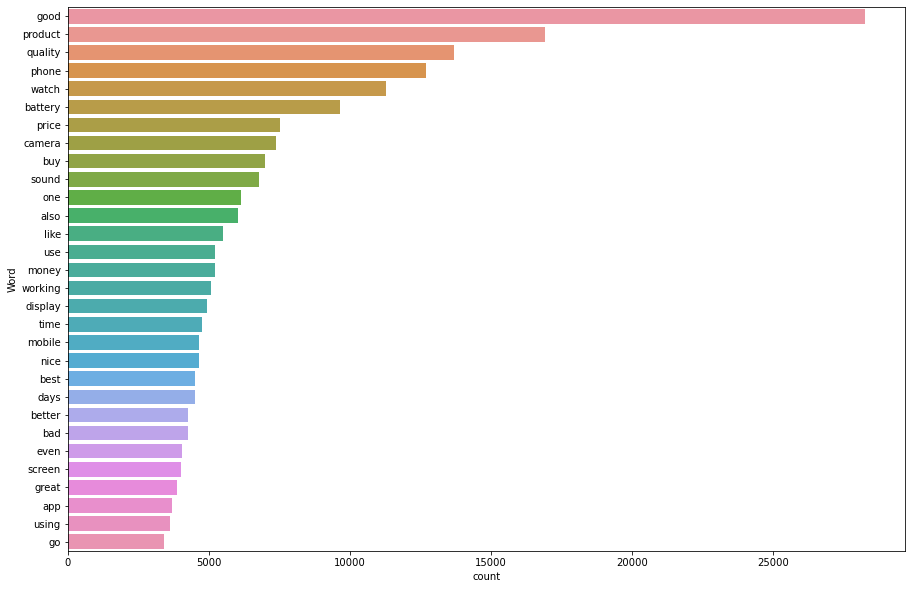

In [47]:
# Function to plot most frequent terms in our Review column
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 most frequent words
    dt = words_df.nlargest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=dt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
freq_words(df['Review'])    

# Top 30 rarely occuring words

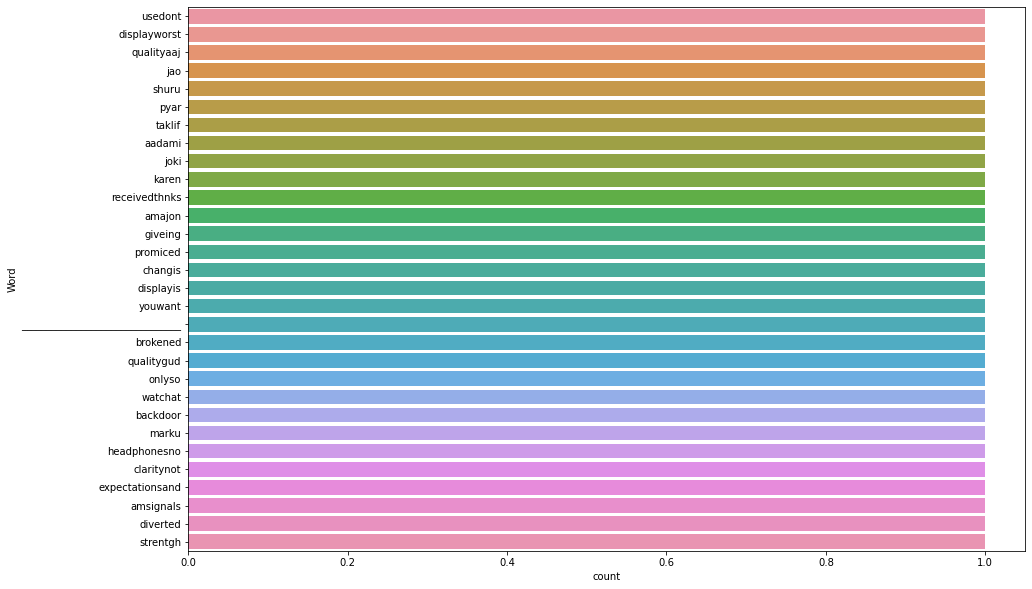

In [48]:
# Function to plot least frequent terms in our Review column
def rare_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 least freq rare words
    dt = words_df.nsmallest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=dt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
rare_words(df['Review'])  

# Model Building and Evaluation Metrics

In [49]:
# Separating features and labels here
x = df['Review']
y = df['Ratings']

# Converting text into vectors using TfidfVectorizer

In [50]:
# Using the n_gram tfidf vectorizer (Word vectors)
word_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'word',
                                  token_pattern = r'\w{1,}',
                                  stop_words = 'english',
                                  ngram_range = (1,3),
                                  max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

# Character vectors
char_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'char',
                                  stop_words = 'english',
                                  ngram_range = (2,6),
                                  max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

# I will now combine both word vectors and character vectors as input for our model
train_features = hstack([train_char_features, train_word_features])

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:502: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"


# Splitting the data into train and test datasets

In [51]:
state = 42
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.30, random_state = state)

# Lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (25746, 150000)
x_test (11034, 150000)
y_train (25746,)
y_test (11034,)


In [52]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier



import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

In [53]:
# Defining the Classification Machine Learning Algorithms
rf = RandomForestClassifier()
lr = LogisticRegression(solver='lbfgs')
svc = LinearSVC()
bnb = BernoulliNB()
mnb = MultinomialNB()
sgd = SGDClassifier()



# Creating a function to train and test the model with evaluation metrics
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)*100
    print(f"ACCURACY SCORE PERCENTAGE:", accuracy)
    # Confusion matrix and Classification report
    print(f"CLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
    print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")
    print("-"*120)
    print("\n")

In [54]:
from scipy import stats
from scipy.stats import zscore
from scipy.sparse import hstack

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, classification_report


In [63]:
for model in [lr,svc,bnb,mnb,sgd]:
    BuiltModel(model)

******************************LogisticRegression******************************
ACCURACY SCORE PERCENTAGE: 70.44589450788472
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.74      0.76      0.75      2259
           2       0.62      0.64      0.63      2209
           3       0.64      0.60      0.62      2234
           4       0.68      0.71      0.69      2137
           5       0.86      0.81      0.83      2195

    accuracy                           0.70     11034
   macro avg       0.71      0.70      0.70     11034
weighted avg       0.71      0.70      0.70     11034

CONFUSION MATRIX: 
 [[1728  341  130   50   10]
 [ 382 1406  304   98   19]
 [ 166  403 1345  265   55]
 [  52  104  254 1511  216]
 [  16   32   75  289 1783]]

------------------------------------------------------------------------------------------------------------------------


******************************LinearSVC******************************
ACCURAC

# Cross validation score for best score models

In [65]:
def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score:", scores)
    print("\n")
    
for model in [lr,svc,sgd,rf]:
    cross_val(model)    

******************************LogisticRegression******************************
Cross validation score: 69.91299619358347


******************************LinearSVC******************************
Cross validation score: 69.72539423599783


******************************SGDClassifier******************************
Cross validation score: 69.33387710712343


******************************RandomForestClassifier******************************
Cross validation score: 69.76345840130506




In the above cell we cross validated the LogisticRegression, LinearSVC, SGDClassifier and RandomForestClassifier algorithms to ensure we pick the best option that does not have any over fitting or underfitting concerns. I can see that RandomForestClassifier has produced the best outcome and we shall use it for further tuning the accuracy percentage.

# HyperParameter Tuning

In [ ]:
 #Lets select the different parameters for tuning our best model (RandomForestClassifier)
grid_params = {'n_estimators':[100,200],
               'criterion':['gini','entropy'],
               'max_depth': [500,800],
               'bootstrap':[True,False]}

# Train the model with given parameters using GridSearchCV
GSCV =  GridSearchCV(rf, grid_params, cv=3, verbose=3)
GSCV.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100; total time= 3.8min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100; total time= 3.9min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100; total time= 3.8min
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200; total time= 7.6min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200; total time= 7.3min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200; total time=12.8min
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100; total time= 7.5min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100; total time= 6.5min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100; total time= 7.1min
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=800, n_esti

In [56]:
# Selecting the best parameters found by GridSearchCV
GSCV.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
# Final Model with the best chosen parameters list
best_model = RandomForestClassifier(bootstrap=False, criterion="gini", max_depth=800, n_estimators=200)
best_model.fit(x_train,y_train) # fitting data to the best model
pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, pred)*100
# Printing the accuracy score
print("ACCURACY SCORE:", accuracy)
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}")

In [ ]:
# Creating a normalized confusion matrix here
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)